# Project Name: Zomato restaurant data analysis
## (Zomato Dataset)
#### By: Varsha Maurya


# 1.Importing required libraries

In [1]:
# importing necessary library
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Collecting / Load the Dataset

In [6]:
# uploading csv fie
df=pd.read_csv("C:/Users/HP/Desktop/.ipynb_checkpoints/Zomato data .csv")

In [7]:
# print top 5 rows in the dataset
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
# print last 5 rows in the dataset
df.tail()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [9]:
# show total number of rows and column
df.shape

(148, 7)

In [10]:
# show the number of each column
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [11]:
# show the data types of each object
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

# 3. Preprocessing the data

In [12]:
# change column name
df.rename(columns={'name':'Restaurant_name'},inplace=True)

In [13]:
# count number of null values
df.isnull().sum()


Restaurant_name                0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [14]:
# show datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Restaurant_name              148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [15]:
# show the count,mean,max,min.
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [16]:
# remove denominator from rate
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
df['rate']=df['rate'].apply(handleRate)
print(df.head())

         Restaurant_name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# 4. Visualization using different graph

Text(0.5, 0, 'Type of restaurant')

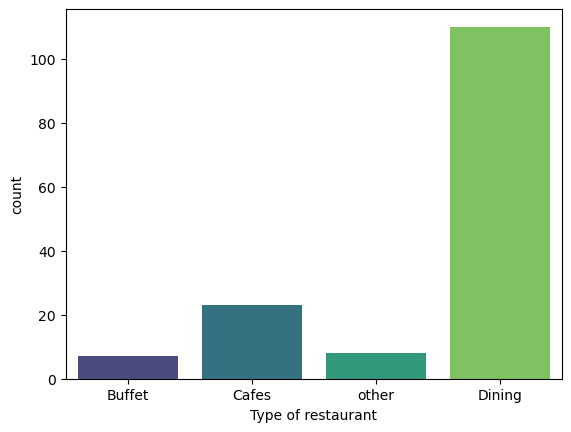

In [17]:
#  countplot for types of restaurant
sns.countplot(x=df['listed_in(type)'],palette='viridis')

plt.xlabel("Type of restaurant")

## Conclusion:  
#### The majority of restaurant falls into the dining category.

Text(0, 0.5, 'Votes')

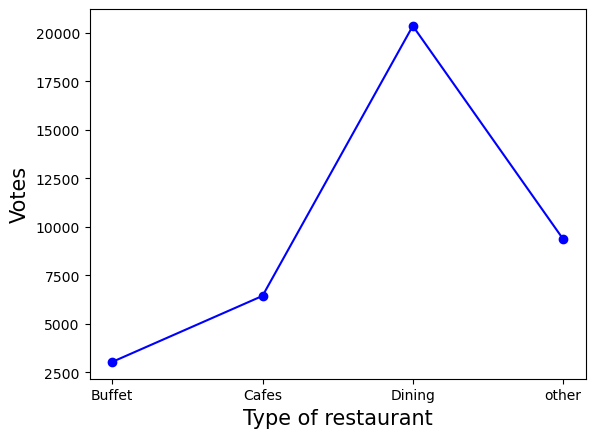

In [18]:
# line plot for types of restaurant with votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="black", size=15)
plt.ylabel("Votes", c="black", size=15)

## Conclusion:
#### Dining restaurant are preffered by a large number of individuals




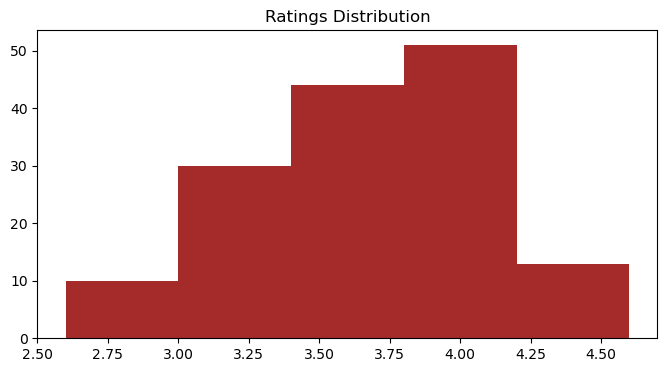

In [19]:

# hist graph to show rating distribution
plt.figure(figsize=(8,4))
plt.hist(df['rate'],bins=5,color='brown')
plt.title("Ratings Distribution")


plt.show()


## Conclusion
### The majority of restaurnt rating range from 3.5 to 4

In [20]:

# check which restaurant get maximum votes
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes,'Restaurant_name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: Restaurant_name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

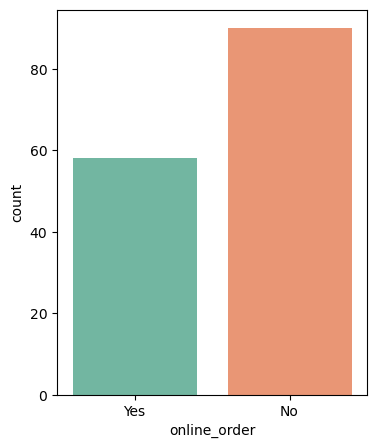

In [21]:
# countplot for online_order
plt.figure(figsize=(4,5))
sns.countplot(x=df['online_order'],palette='Set2')


## Conclusion
### This suggest that a majority of the Restaurant do not accept online orders.

<Axes: xlabel='book_table', ylabel='count'>

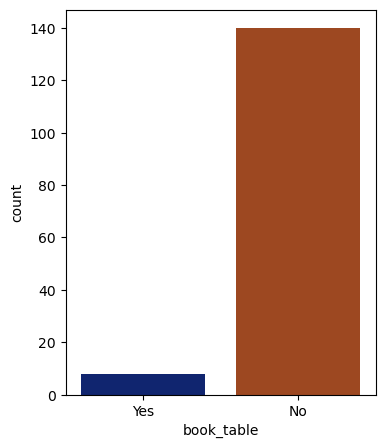

In [22]:
# count plt for how many book_table
plt.figure(figsize=(4,5))
sns.countplot(x=df['book_table'],palette='dark')



## Conclusion 
### This show that majority of the customers do not book table

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

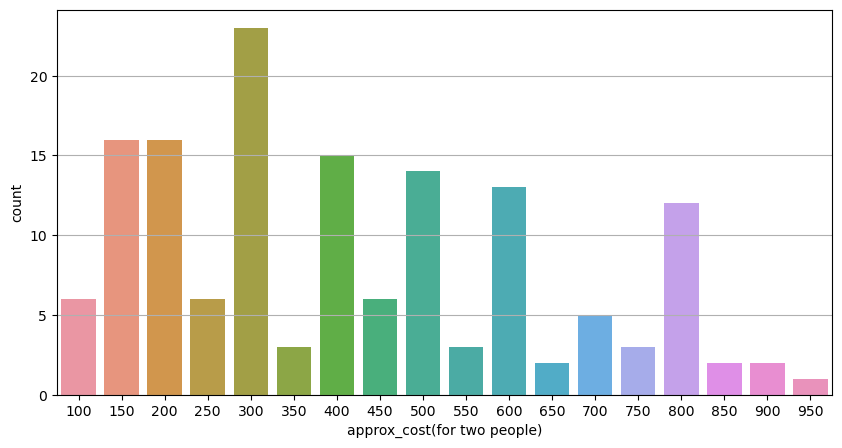

In [23]:
#countplot for counting appros_cost(for two people)
plt.figure(figsize=(10,5))
couple_data=df['approx_cost(for two people)']
plt.grid()

sns.countplot(x=couple_data)


## Conclusion
### This show that the majority of the people prefer restaurant with an approx cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

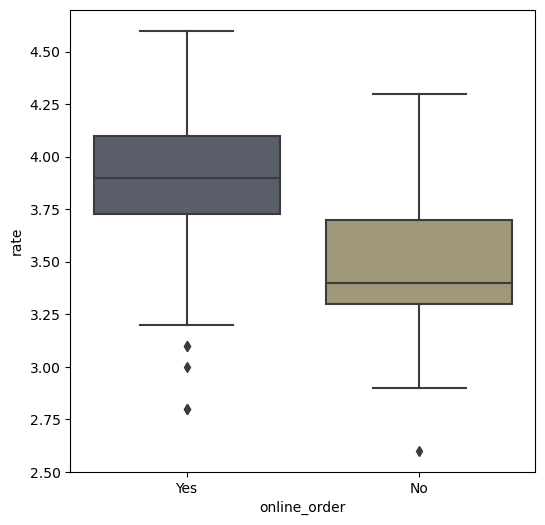

In [24]:
# boxplot between online_order and rate
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df,palette = 'cividis')




In [25]:
## Conclusion
#### Offline orders received lower rating as compared to online.

Top 5 Restaurants:
           Restaurant_name  rate
7                   Onesta   4.6
44                  Onesta   4.6
38       Empire Restaurant   4.4
86           Meghana Foods   4.4
52  Corner House Ice Cream   4.3
9                Smacznego   4.2


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Onesta'),
  Text(1, 0, 'Empire Restaurant'),
  Text(2, 0, 'Meghana Foods'),
  Text(3, 0, 'Corner House Ice Cream'),
  Text(4, 0, 'Smacznego')])

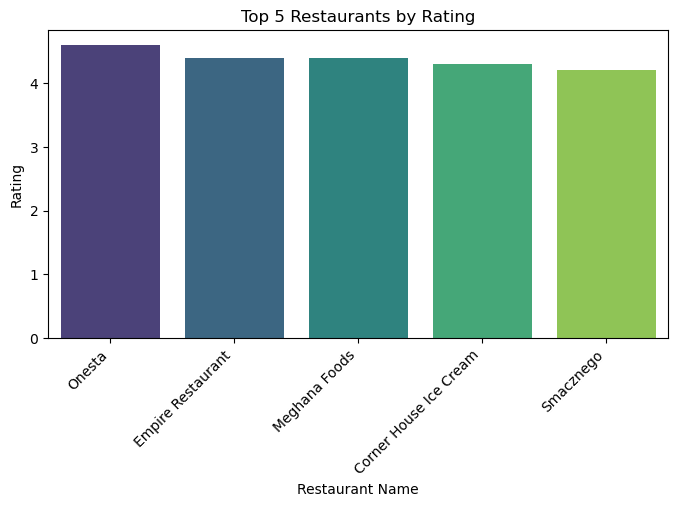

In [26]:

# Sort the DataFrame based on a relevant column (e.g., rating or votes) to find the top five restaurants
top_restaurants = df.nlargest(6, 'rate')  # Assuming 'rating' is the column representing restaurant ratings

# Print the top five restaurants

print("Top 5 Restaurants:")
print(top_restaurants[['Restaurant_name', 'rate']])

# Visualize the top five restaurants using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Restaurant_name', y='rate', data=top_restaurants,palette='viridis')
plt.title('Top 5 Restaurants by Rating')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')

## Conclusion
#### Onesta is the restaurant which gets highest rating and top 5 restaurant by rating are Onesta,Empire restaurant,Meghana foods ,Corner house ice cream and smacznego

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Onesta'),
  Text(1, 0, 'Empire Restaurant'),
  Text(2, 0, 'Meghana Foods'),
  Text(3, 0, 'Corner House Ice Cream'),
  Text(4, 0, 'Smacznego')])

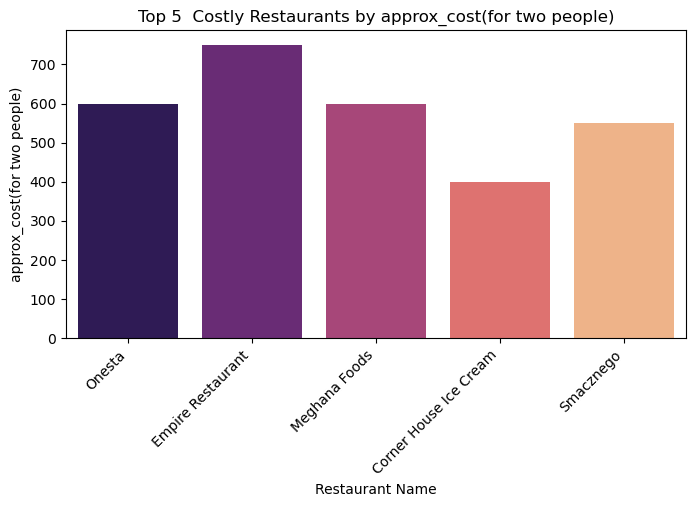

In [27]:
# barplot for Top 5  Costly Restaurants by approx_cost(for two people)
costly_restaurant = df.nlargest(6, 'approx_cost(for two people)') 
plt.figure(figsize=(8, 4))
sns.barplot(x='Restaurant_name', y='approx_cost(for two people)', data=top_restaurants,palette = 'magma')
plt.title('Top 5  Costly Restaurants by approx_cost(for two people)')
plt.xlabel('Restaurant Name')
plt.ylabel('approx_cost(for two people)')
plt.xticks(rotation=45, ha='right')

## Conclusion

#### Above, we see that the most costly restaurant is Empire restaurant and top 5 restaurant are onesta,Empire restaurant,meghna foods,corner house ice cream and Smacznego

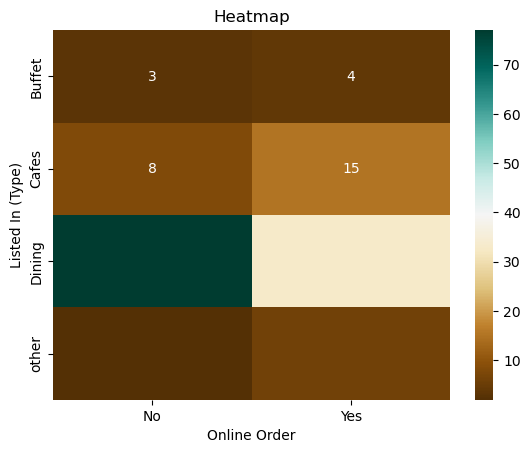

In [28]:
# heat map for online_order and listed (in type)
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="BrBG", fmt='d',annot_kws={"color": 'white'})
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


## Conclusion:
#### Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

In [29]:
# show all columns name
df["Restaurant_name"].value_counts().index

Index(['San Churro Cafe', 'CAFE NOVA', 'Onesta', 'Jalsa',
       'Kotian Karavali Restaurant', 'Kaggis', 'Ayda Persian Kitchen',
       'Chatar Patar', 'Polar Bear', 'Kidambi's Kitchen',
       ...
       'Shree Cool Point', 'Petoo', 'Tasty Bytes', 'Beijing Bites', 'Recipe',
       'Kitchen Garden', 'Hotboxit', 'Domino's Pizza', 'McDonald's',
       'Vijayalakshmi'],
      dtype='object', name='Restaurant_name', length=145)

# 5. Decision tree classifier

In [30]:
# Recommend restaurant name according to customers input.
# x = df.drop(columns=['Restaurant_name', 'online_order', 'votes', 'listed_in(type)', 'book_table'])
# y = df['Restaurant_name']  # Replace 'target_variable' with the actual target variable you want to predict
# model = DecisionTreeClassifier()
# model.fit(x,y)
# predictions = model.predict([[4.5,1200],[4.8,789]])
#predictions



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Peppy Peppers', 'Onesta'], dtype=object)

# 6.Train the model and check accuracy

In [31]:
# check accuracy level of our model
# Drop unnecessary columns
#x = df.drop(columns=['Restaurant_name', 'online_order', 'votes', 'listed_in(type)', 'book_table'])

# Extract the target variable
# = df['Restaurant_name']  

# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Initialize the model
#model = DecisionTreeClassifier()

# Fit the model
#model.fit(x_train, y_train)

# Predict on the test set
#predictions = model.predict(x_test)

# Calculate accuracy
# score = accuracy_score(y_test, predictions)
#print("Accuracy:", score)


Accuracy: 0.06666666666666667


# 7. Save the traing file with the name data.joblib

In [32]:
#x = df.drop(columns=['Restaurant_name', 'online_order', 'votes', 'listed_in(type)', 'book_table'])

# Extract the target variable
#y = df['Restaurant_name']  
#model = DecisionTreeClassifier()
#model.fit(x,y)
#joblib.dump(model,'data.joblib')



['data.joblib']

# 8. Recommend restaurant according to Customer Demands.


In [3]:
model=joblib.load('data.joblib')
predictions=model.predict([[3.6,400]])
predictions

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Sunsadm'], dtype=object)